## Simulation und Modellierung WS16/17 - Uebung 06

### Aufgabe 1

Die Ableitung einer Funktion $f(x)$ an einer Stelle $x_0$ kann mit Hilfe eines geeigneten Differenzenquotienten approximiert werden. Es gilt

$\lim\frac{f(x_0+h)-f(x_0-h)}{2h}=f'(x_0)$

- Definieren Sie eine NxN Matrix D, welche auf einen Nx1 Vektor f angewendet die symmetrische Differenz der Gitterpunkte $(Df)_i = f_{i+1}-f_{i-1}$ berechnet, wobei man periodische Randbedingungen $f_{i+N}=f_i$ annimmt. 
- berechnen Sie mit Hilfe dieser Matrix die erste und zweite Abbleitung der Funktion $f(x) = sin(x)$ welche an N Gitterpunkten auf dem Intervall $[0,2\pi)$ gegeben sei.
- plotten Sie $f(x)$, $f'(x)$ und $f''(x)$ in ein Diagramm.

In [2]:
#Ausgabe der Plots im Notebook und laden von numpy und pylab (matplotlib+pyplot)
import numpy as np 
from pylab import *

In [6]:
N = 1000

def matrix_D(N):
    """
    Matrixoperator Differenzenquotient
    """
    D=np.eye(N,k=1)-np.eye(N,k=-1) 
    #periodische Randbedingungen:
    D[0,-1]  =-1 # erste Zeile
    D[N-1,0] = 1 # zweite Zeile
    return D

def first_derivative(x, y, N, h):
    """
    Erste Ableitung der Funktion y von x mittels 
    symmetrischem Differenzenquotienten
    """
    D = matrix_D(N)
    return D.dot(y)/(2*h)
    
a= 0.
b= 2*np.pi
x = np.linspace(a, b, N, endpoint = False)
y = sin(x)
h = (b-a)/N

f = sin(x)
df = first_derivative(x, f, N, h)
d2f = first_derivative(x, df, N, h)

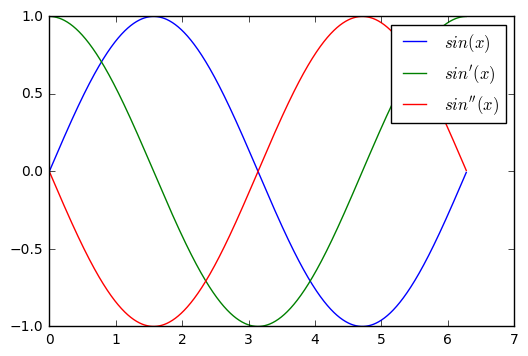

In [7]:
#define N, D, x, h, f, df  and d2f here

plot(x,f,'b',label='$sin(x)$')
plot(x,df,'g', label='$sin\'(x)$')
plot(x,d2f,'r',label="$sin''(x)$")
legend()
show()

### Aufgabe 2

Der getriebene, gedaempfte harmonische Oszillator genuegt der Differentialgleichung

$\ddot x+2\gamma\dot x+\omega_0^2x=A\cos(t)$
z.B. mit $\gamma=0.1$, $\omega_0=1.0$ und $A=1.0$.

- Schreiben Sie eine Funktion limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100), welche die lineare, inhomogene Differentialgleichung in N Zeitschritte ueber eine Periode der antreibenen Kraft diskretisiert und als lineares Gleichungssystem 

$\frac{1}{4h^2}\textrm{D}^2\cdot\vec{x}+2\gamma\frac{1}{2h}\textrm{D}\cdot\vec{x}+\omega_0^2\mathbf{1}\cdot\vec{x}=Acos(\vec{t})$

loest. 

- Bestimmen und zeichnen Sie die Amplitude $B$ und die Phasenverschiebung $\varphi$ der Loesung $x = B\cos(t-\varphi)$ als Funktion von $\omega_0$. Hierfuer kann man die numpy Array Methode x.argmax() verwenden, welche den Index des maximalen Elements von x liefert.
- Zeichnen Sie die analytischen Loesungen


$B = \frac{A}{\sqrt{(\omega_0^2-1)^2+4\gamma^2}} $
$\tan\varphi=\frac{-2\gamma}{\omega_0^2-1}$
ueber die von Ihnen numerisch gefundenen Loesungen als Funktion der Eigenfrequenz $\omega_0$ des harmonischen Oscillators. *Hinweis :* Die Methode numpy.arctan2(y,x) gibt den Winkel alpha mit sin(alpha)=y und cos(alpha)=x zurueck.

In [ ]:
import numpy as np
def limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100) :
    """ 
    Bestimmt die Loesung der inhomogenen linearen Differentialgleichung
    d^2x/dt^2 + 2 gamma dx/dt + omega0^2 x = A cos(t)
    auf dem in N Punkte diskretisierten periodischen Zeitintervall [0,2pi)
    """
    t0 = 0.
    t_end = 2.*np.pi
    t = np.linspace(t0, t_end, N, endpoint = False)
    h = (t_end-t0)/len(t)
    # GLS A*x = b 
    b = A*np.cos(t)
    D = matrix_D(N)
    matA = D.dot(D)/(4.*h**2) + gamma*D/h + omega0**2*np.eye(N)
    x = np.linalg.solve(matA, b)
    return x, t


In [ ]:
L=100
omegas = np.linspace(0.1,4,L)
B = np.zeros(L)
phi = np.zeros(L)

for i in range(L):
    x, t = limit_cycle(omega0=omegas[i],gamma=0.1,A=1.0,N=500)
    abs_x = (x)
    B[i] = x[x.argmax()]
    phi[i] = -t[x.argmax()]

# bestimme B und phi numerisch fuer alle Werte in omega0
# bestimme die theoretischen Werte Bth und phith
gamma= 0.1
A = 1.
Bth = A/np.sqrt((omegas**2-1.)**2+4.*gamma**2)
phith = np.arctan2(-2.*gamma,(omegas**2-1))

figure(2)
subplot(2,1,1)
plot(omegas,B,label='num.')
plot(omegas,Bth,'k--',label='Theorie')
legend(loc='best')
xlabel('$\omega_0$')
ylabel('$B$')


subplot(2,1,2)
plot(omegas,phi,label='num.')
plot(omegas,phith,'k--',label='Theorie')
legend(loc='best')
xlabel('$\omega_0$')
ylabel('$\phi$')
show()

In [ ]:
from scipy.integrate import odeint

t = np.linspace(0, 100, 5000)
y0 = np.zeros(2)

def harmonically_driven_damped_osci(y, t, omega0,gamma,A):
    '''
    second order ODE corresponds to 1st order system of ODE:
    (dot x1, dot x2) = F*(x1, x2) + A*cos(t)
    '''
    
    F = np.zeros((2,2))
    F[0,0] = -2.*gamma
    F[0,1] = -omega0**2
    F[1,0] = 1.
    F[1,1] = 0.
    return F.dot(y)+A*cos(t)
    

sol = odeint(harmonically_driven_damped_osci, y0, t, (0.3,0.1,1.0))
plot(sol[:,1])
sol = odeint(harmonically_driven_damped_osci, y0, t, (0.6,0.1,1.0))
plot(sol[:,1])
show()